In [1]:
library(tidyverse)
library(jsonlite)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [2]:
multiqc_data = fromJSON("../02_qc/multiqc/multiqc_report_dmb_all_data/multiqc_data.json")

In [3]:
# Get all the subjects
subjects <- names(multiqc_data$report_saved_raw_data$multiqc_star)

# Function to transform each subject's data into a tibble
subject_to_tibble <- function(subject) {
  data <- multiqc_data$report_saved_raw_data$multiqc_star[[subject]]
  tibble(name = names(data), value = unlist(data)) %>%
    tidyr::spread(name, value) %>%
    dplyr::mutate(subject = subject)  # to keep track of the subject
}

# Apply this function to all subjects
tibbles <- lapply(subjects, subject_to_tibble)

# Combine all tibbles into one
combined_tibble <- dplyr::bind_rows(tibbles) %>%
rename(filename = subject) %>%
relocate(filename)

star_stats = combined_tibble
star_stats

filename,avg_input_read_length,avg_mapped_read_length,deletion_length,deletion_rate,insertion_length,insertion_rate,mismatch_rate,multimapped,multimapped_percent,⋯,num_splices,total_reads,uniquely_mapped,uniquely_mapped_percent,unmapped_mismatches,unmapped_mismatches_percent,unmapped_other,unmapped_other_percent,unmapped_tooshort,unmapped_tooshort_percent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17_Highfatdiet_IC_right_S29,102,101.68,1.42,0.01,1.13,0.00,0.17,1426604,3.30,⋯,4239034,43226575,39906436,92.32,0,0,406364,0.94,1374719,3.18
13_Highfatdiet_SC_left_S10,102,101.70,1.43,0.01,1.13,0.00,0.15,945629,4.14,⋯,2169017,22847978,20766641,90.89,0,0,226136,0.99,847439,3.71
1_Chow_IC_left_S5,102,101.70,1.42,0.01,1.13,0.00,0.16,984328,4.00,⋯,2330327,24618568,22419103,91.07,0,0,221608,0.90,930752,3.78
5_Chow_Hip_right_S54,102,101.70,1.44,0.01,1.13,0.00,0.16,5290154,3.89,⋯,12489334,135926361,124225076,91.39,0,0,1182576,0.87,4893420,3.60
4_Chow_SC_right_S65,102,101.69,1.44,0.01,1.13,0.00,0.16,3392581,4.16,⋯,7688387,81544560,73621595,90.28,0,0,758343,0.93,3547089,4.35
18_Highfatdiet_SC_right_S90,102,101.71,1.43,0.01,1.13,0.00,0.16,2013276,4.28,⋯,4850133,46992386,42594915,90.64,0,0,399967,0.85,1868084,3.97
6_Chow_Hip_right_S86,102,101.70,1.45,0.01,1.14,0.00,0.16,1839889,3.94,⋯,4604003,46694183,42458792,90.93,0,0,397176,0.85,1873734,4.01
11_Fasting_IC_right_S16,102,101.70,1.45,0.01,1.13,0.00,0.16,1678912,4.19,⋯,3832797,40036363,36214547,90.45,0,0,396558,0.99,1634298,4.08
9_Fasting_Hyp_both_S39,102,101.69,1.43,0.01,1.13,0.00,0.16,1986943,4.84,⋯,4328584,41019628,36877772,89.90,0,0,361315,0.88,1675188,4.08


In [4]:
star_stats %>% filter(filename == '145_1_Hyp_chow_S2') %>% t

filename,145_1_Hyp_chow_S2
avg_input_read_length,122
avg_mapped_read_length,118.94
deletion_length,1.31
deletion_rate,0.02
insertion_length,1.11
insertion_rate,0.01
mismatch_rate,0.74
multimapped,1426976
multimapped_percent,5.89
multimapped_toomany,14289


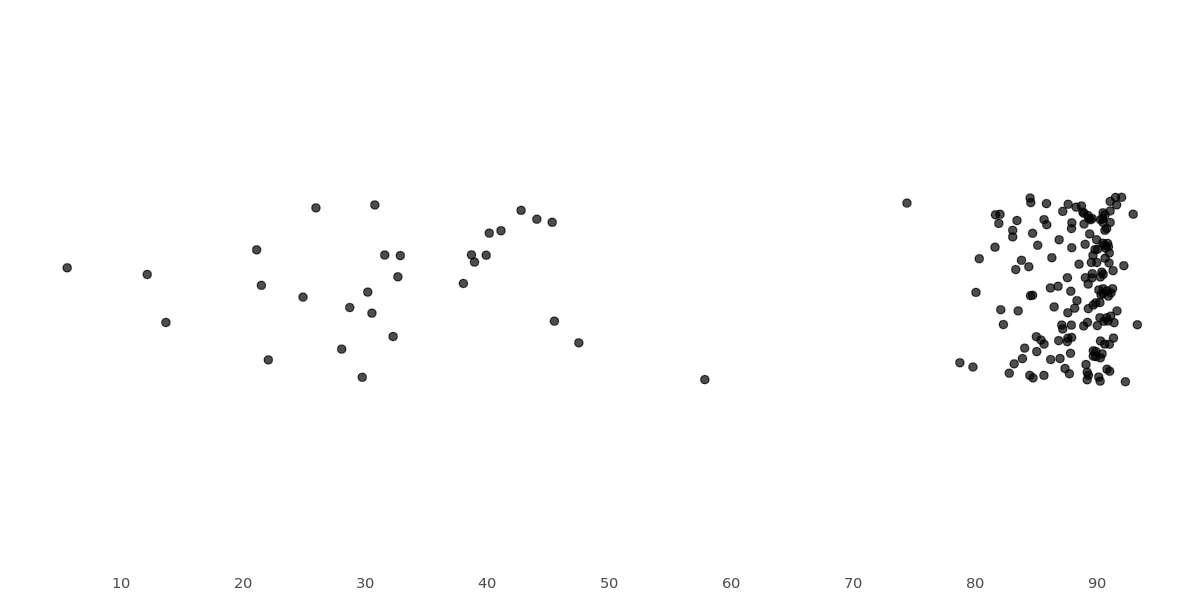

In [5]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(star_stats, aes(y = "All Samples", x = uniquely_mapped_percent)) +
  geom_jitter(width = 0, height = 0.2, size = 2, alpha = 0.7) +
  scale_x_continuous(breaks = seq(0, 100, 10)) +
  labs(x = NULL, y = NULL) +
  theme_minimal() +
  theme(axis.line.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
       panel.grid = element_blank())



In [6]:
star_stats = star_stats %>%
mutate(fail_qc = case_when(uniquely_mapped_percent <= 70 ~ TRUE,
                           TRUE ~ FALSE))

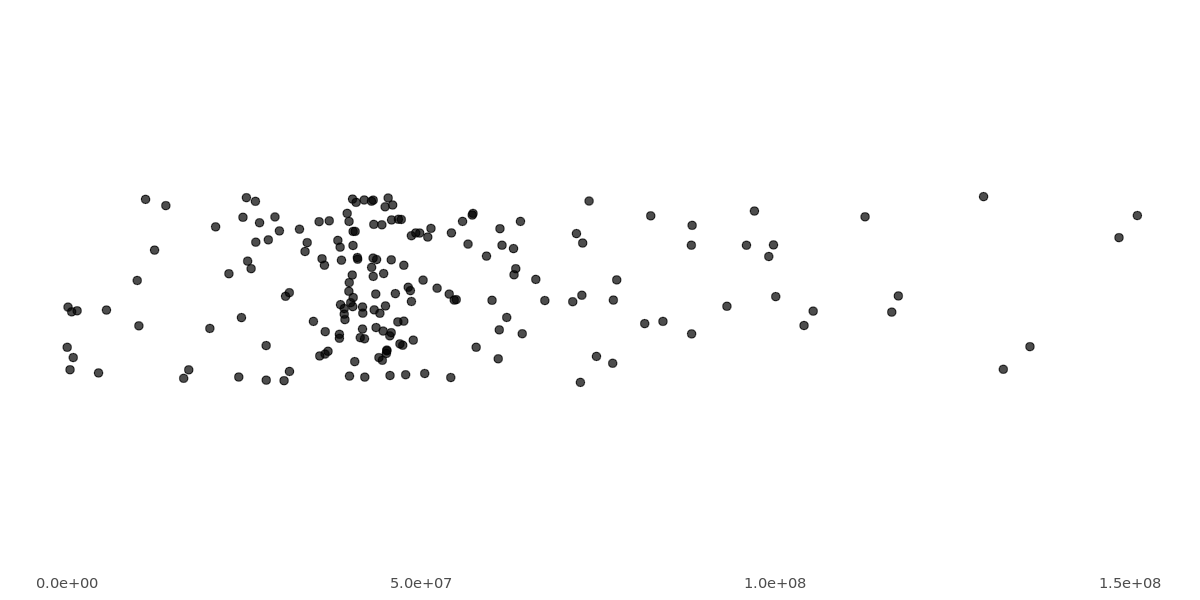

In [7]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(star_stats, aes(y = "All Samples", x = total_reads)) +
  geom_jitter(width = 0, height = 0.2, size = 2, alpha = 0.7) +
#   scale_x_continuous(breaks = seq(0, 100, 10)) +
  labs(x = NULL, y = NULL) +
  theme_minimal() +
  theme(axis.line.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
       panel.grid = element_blank())



In [8]:
star_stats %>% pull(uniquely_mapped_percent) %>% sd

[1] 21.20461

In [9]:
star_stats %>% pull(uniquely_mapped_percent) %>% mean

[1] 79.11946

In [10]:
# Get all the subjects
subjects <- names(multiqc_data$report_saved_raw_data$multiqc_fastqc)

# Function to transform each subject's data into a tibble
subject_to_tibble <- function(subject) {
  data <- multiqc_data$report_saved_raw_data$multiqc_fastqc[[subject]]
  tibble(name = names(data), value = unlist(data)) %>%
    tidyr::spread(name, value) %>%
    dplyr::mutate(subject = subject)  # to keep track of the subject
}

# Apply this function to all subjects
tibbles <- lapply(subjects, subject_to_tibble)

# Combine all tibbles into one
combined_tibble <- dplyr::bind_rows(tibbles) %>%
rename(filename = subject) %>%
relocate(filename) %>%
mutate(`%GC` = as.numeric(`%GC`),
       `Total Sequences` = as.numeric(`Total Sequences`),
       `total_deduplicated_percentage` = as.numeric(`total_deduplicated_percentage`))

fastqc_stats = combined_tibble
fastqc_stats

filename,%GC,adapter_content,avg_sequence_length,basic_statistics,Encoding,File type,Filename,median_sequence_length,overrepresented_sequences,⋯,per_sequence_gc_content,per_sequence_quality_scores,per_tile_sequence_quality,Sequence length,sequence_duplication_levels,sequence_length_distribution,Sequences flagged as poor quality,Total Bases,Total Sequences,total_deduplicated_percentage
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
15_Highfatdiet_PFC_left_S72_R1_001,47,pass,51,pass,Sanger / Illumina 1.9,Conventional base calls,15_Highfatdiet_PFC_left_S72_R1_001.fastq.gz,51,warn,⋯,pass,pass,fail,51,warn,pass,0,2.4 Gbp,47186463,58.64323
5_Chow_SC_right_S47_R1_001,47,pass,51,pass,Sanger / Illumina 1.9,Conventional base calls,5_Chow_SC_right_S47_R1_001.fastq.gz,51,warn,⋯,pass,pass,fail,51,warn,pass,0,2.3 Gbp,45761306,65.54584
Undetermined_S0_R1_001,41,pass,51,pass,Sanger / Illumina 1.9,Conventional base calls,Undetermined_S0_R1_001.fastq.gz,51,fail,⋯,fail,pass,fail,51,fail,pass,0,8.6 Gbp,169779664,23.80305
14_Highfatdiet_PFC_left_S75_R2_001,46,pass,51,pass,Sanger / Illumina 1.9,Conventional base calls,14_Highfatdiet_PFC_left_S75_R2_001.fastq.gz,51,warn,⋯,pass,pass,warn,51,warn,pass,0,2 Gbp,40336088,65.62627
13_Highfatdiet_IC_left_S81_R1_001,47,pass,51,pass,Sanger / Illumina 1.9,Conventional base calls,13_Highfatdiet_IC_left_S81_R1_001.fastq.gz,51,warn,⋯,pass,pass,fail,51,warn,pass,0,2.1 Gbp,41391646,65.17242
12_Fasting_Hyp_both_S23_R2_001,60,fail,51,pass,Sanger / Illumina 1.9,Conventional base calls,12_Fasting_Hyp_both_S23_R2_001.fastq.gz,51,warn,⋯,fail,pass,warn,51,pass,pass,0,33.1 Mbp,649149,78.34469
14_Highfatdiet_SC_left_S74_R2_001,47,pass,51,pass,Sanger / Illumina 1.9,Conventional base calls,14_Highfatdiet_SC_left_S74_R2_001.fastq.gz,51,warn,⋯,pass,pass,warn,51,warn,pass,0,2.3 Gbp,45328348,62.12594
11_Fasting_PFC_right_S82_R1_001,47,pass,51,pass,Sanger / Illumina 1.9,Conventional base calls,11_Fasting_PFC_right_S82_R1_001.fastq.gz,51,warn,⋯,pass,pass,fail,51,warn,pass,0,2 Gbp,40367873,64.38190
17_Highfatdiet_IC_right_S29_R1_001,46,pass,51,pass,Sanger / Illumina 1.9,Conventional base calls,17_Highfatdiet_IC_right_S29_R1_001.fastq.gz,51,warn,⋯,pass,pass,fail,51,warn,pass,0,2.2 Gbp,43226575,66.57823


In [11]:
star_stats = star_stats %>%
mutate(fail_qc = case_when(uniquely_mapped_percent <= 70 ~ TRUE,
                           TRUE ~ FALSE))

In [12]:
samples_failing_qc = star_stats %>% filter(fail_qc) %>% pull(filename)
samples_failing_qc %>% qs::qsave('samples_failing_qc.qs')
samples_failing_qc %>% dput

c("10_Fasting_SC_right_S88", "12_Fasting_Hyp_both_S23", "4_Chow_Hip_right_S68", 
"Undetermined_S0", "11_Fasting_Hip_right_S35", "144_1_Hyp_chow_S68", 
"145_2_HIPL_chow_S8", "143_5_SCL_fast_S14", "144_2_ICL_chow_S24", 
"143_3_SCL_fast_S13", "144_1_HIPL_chow_S1", "143_2_ZIL_chow_S7", 
"144_5_Hyp_fast_S10", "144_4_ICL_fast_S4", "142_3_ZIL_chow_S20", 
"143_5_Hyp_fast_S12", "144_4_HIPL_fast_S15", "142_4_SCL_fast_S16", 
"143_4_SCL_fast_S3", "145_5_Hyp_fast_S17", "142_4_HIPL_fast_S6", 
"145_4_ZIL_fast_S5", "142_2_Hyp_chow_S19", "142_2_SCL_chow_S21", 
"144_2_ZIL_chow_S11", "143_1_HIPL_chow_S9", "145_1_Hyp_chow_S2", 
"143_4_ZIL_fast_S18", "145_3_ICL_fast_S22", "145_2_ICL_chow_S23"
)
